<a href="https://colab.research.google.com/github/EgorTrushin/Molpro_Tutorials/blob/main/Tutorial_pair_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation of pair densities

**Author:** Egor Trushin  
**Date created:** 04/05/2021  
**Last modified:** 09/05/2021


## Input parameters

To perform calculation of pair densities one have to specify **plotp2=1** in input file. Additionally, one have to point out names of two grid-files **grid1** and **grid2** together with the number of grid-points **grid1n** and **grid2n** in each file, respectively. **grid1n** contains grid-points for which pair densities are calculated. **grid2n** contains positions of reference electron.
Both files have the format:
```
x_1, y_1, z_1
x_2, y_2, z_2
...
x_n, y_n, z_n
```
During calculation, files with results are written for all specified positions of reference electron. These files are named as **pmat1.dat**, **pmat2.dat**, etc.

Optionally, to verify that calculations are correct, additional tests can be performed specifiyng **testp2=1** and **ntestp2**.

For instance, additional line in input file might be 
```
plotp2=1, grid1='GridVal', grid1n=20001, grid2='GridRE', grid2n=2, testp2=1, ntestp2=100
```

## Examples

At the moment pair density calculations are implemented only inside **rirpa** driver, i.e., for the case of non-spin-polarized and only for RPA.

### Correlation contribution to pair density for hydrogen molecule: RPA

```
memory,10000,m

basis={
default,aug-cc-pV6Z
set,ri;default,aug-cc-pV5Z/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

H       0.000000    0.000000    -0.370715095
H       0.000000    0.000000     0.370715095
}

df-ks,pbe,df_basis=aug-cc-pwCV5Z/mp2fit,maxit=60
{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,rirpa,rpa=1,\
orb=2100.2,\
charge=1,homo=0,\
nquad=100,\
thr_x0=1d-10,\
dfit=1,direct=1,\
thr_overlap_ri=1d-10,thr_fai_ri=1d-10,\
plotp2=1,testp2=1,grid1='GridVal',grid1n=3000,grid2='GridRE',grid2n=2,ntestp2=100
```

### Correlation contribution to pair density for hydrogen molecule: RPA with scaled Coulomb kernel

```
memory,10000,m

basis={
default,aug-cc-pV6Z
set,ri;default,aug-cc-pV5Z/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

H       0.000000    0.000000    -0.370715095
H       0.000000    0.000000     0.370715095
}

df-ks,pbe,df_basis=aug-cc-pwCV5Z/mp2fit,maxit=60
{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,rirpa,rpa=1,orb=2100.2,\
nquad=100,\
vc_scal=0.5,\
thr_x0=1d-10,\
dfit=1,direct=1,\
thr_overlap_ri=1d-10,thr_fai_ri=1d-10,\
plotp2=1,testp2=1,grid1='GridVal',grid1n=3000,grid2='GridRE',grid2n=2,ntestp2=100
```

GridRE file for both calculations:
```
0.00000000   0.00000000   0.00000000
0.00000000   0.00000000   0.74143019
```

GridVal file for both calculations:
```
0.0000000   0.0000000   -3.0000000
0.0000000   0.0000000   -2.9979993
0.0000000   0.0000000   -2.9959987
0.0000000   0.0000000   -2.9939980
0.0000000   0.0000000   -2.9919973
...
0.0000000   0.0000000   2.9919973
0.0000000   0.0000000   2.9939980
0.0000000   0.0000000   2.9959987
0.0000000   0.0000000   2.9979993
0.0000000   0.0000000   3.0000000
```


In [1]:
# Upload processed output to Colab
#from google.colab import files
#files.upload()

In [2]:
# Unzip data
#!unzip Outputs.zip

In [3]:
import numpy as np

def load_p2(filename):
    """Reads correlation contribution to pair density 
    from file provided by Molpro"""
    coord = list()
    p2 = list()
    for line in open(filename):
        aux = line.split()
        coord.append(float(aux[2]))
        p2.append(float(aux[6]))
    coord = np.array(coord)
    p2 = np.array(p2)
    return coord, p2

def load_p2_ref(filename):
    """Reads reference pair density"""
    coord = list()
    p2 = list()
    for line in open(filename):
        aux = line.split()
        coord.append(float(aux[0]))
        p2.append(float(aux[1]))
    coord = np.array(coord)
    p2 = np.array(p2)
    return coord, p2

In [4]:
# Import and customize matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.titlesize"] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['lines.linewidth'] = 1.75
plt.rcParams['axes.unicode_minus'] = False

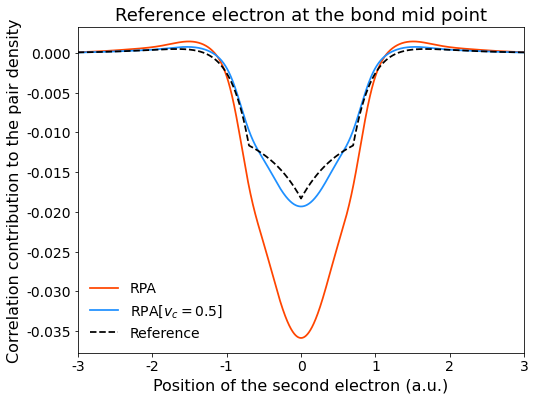

In [5]:
plt.figure(figsize=(8,6))
plt.title("Reference electron at the bond mid point")
plt.xlim(-3,3)
plt.xlabel("Position of the second electron (a.u.)")
plt.ylabel("Correlation contribution to the pair density")

coord, v_exchange = load_p2("Outputs/H2_RPA/pmat1.dat")
plt.plot(coord, v_exchange, color="orangered", label="RPA")

coord, v_exchange = load_p2("Outputs/H2_RPA_vc_scal/pmat1.dat")
plt.plot(coord, v_exchange, color="dodgerblue", label=r"RPA[$v_c=0.5$]")

coord, v_exchange = load_p2_ref("Outputs/H2_References/Pc_1.4011au_center.dat")
plt.plot(coord, v_exchange, color="black", linestyle="--", label="Reference")

plt.legend(frameon=False)

plt.show()

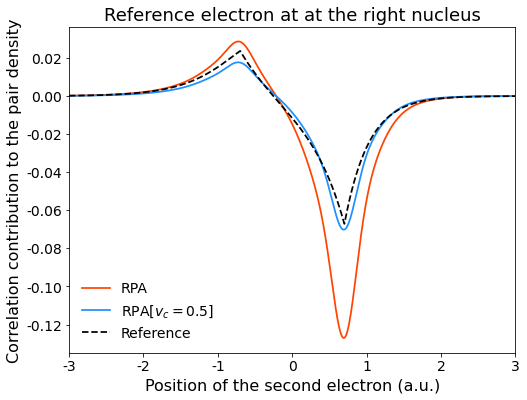

In [6]:
plt.figure(figsize=(8,6))
plt.title("Reference electron at at the right nucleus")
plt.xlim(-3,3)
plt.xlabel("Position of the second electron (a.u.)")
plt.ylabel("Correlation contribution to the pair density")

coord, v_exchange = load_p2("Outputs/H2_RPA/pmat2.dat")
plt.plot(coord, v_exchange, color="orangered", label="RPA")

coord, v_exchange = load_p2("Outputs/H2_RPA_vc_scal/pmat2.dat")
plt.plot(coord, v_exchange, color="dodgerblue", label=r"RPA[$v_c=0.5$]")

coord, v_exchange = load_p2_ref("Outputs/H2_References/Pc_1.4011au_right.dat")
plt.plot(coord, v_exchange, color="black", linestyle="--", label="Reference")

plt.legend(frameon=False)

plt.show()

### References
[1] Erhard et al, [Faraday Discuss.](https://pubs.rsc.org/en/content/articlelanding/fd/2020/d0fd00047g) 224 (2020) 79-97.